# Species diversity in enriched flagellins

In [1]:
library(seqinr)
library(phyloseq)
library(tidyverse)
library(metagMisc)
library(microViz)
library(conflicted)
library(pheatmap)
library(viridis)
library(gridExtra)
library(ggplot2)
library(pheatmap)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.9     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.4.1
✔ ggplot2   3.3.6     ✔ tibble    3.2.1
✔ lubridate 1.8.0     ✔ tidyr     1.2.1
✔ purrr     0.3.5     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::count()  masks seqinr::count()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘metagMisc’


The following object is masked from ‘package:purrr’:

    some



microViz version 0.9.6 - Copyright (C) 2022 David Barnett
* Website: https://david-barnett.github.io/microViz/
* Useful? For citation info, run: citation(

### Declare preferences

In [2]:
conflict_prefer("count","dplyr")
conflict_prefer("filter","dplyr")

[conflicted] Will prefer dplyr::count over any other package.
[conflicted] Will prefer dplyr::filter over any other package.


### Source functions

In [6]:
#Import miscellaneous functions for plots and edger
source("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/plots_functions.r")

In [7]:
setwd("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/shortbred/edgeR")

### Import files

In [25]:
#Import complete flagellin database
flagellins.markers.sb=seqinr::read.fasta("/ebio/abt3_projects/small_projects/aborbon/Thesis_FlagellinDiversity/1_shortbred/out.finalmap.faa",seqtype="AA")

In [8]:
DA.biome1 = read_tsv("subsampled_opt1/DA.host.env.tsv",col_names=T)
DA.animalsvsplants = read_tsv("subsampled_opt1/DA.animal.plants.tsv",col_names=T)

Rows: 623 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (9): Accession, Domain, Phylum, Class, Order, Family, Genus, Species, En...
dbl (4): logFC, logCPM, PValue, FDR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 203 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (9): Accession, Domain, Phylum, Class, Order, Family, Genus, Species, En...
dbl (4): logFC, logCPM, PValue, FDR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
DA.env = filter(DA.biome1,EnrichedIn=="Environmental")
DA.host = filter(DA.biome1,EnrichedIn=="Host-associated")
tmpPl = filter(DA.animalsvsplants,EnrichedIn=="Plants")
tmpAn = filter(DA.animalsvsplants,EnrichedIn=="Animals")

# Compare species diversity of enriched flagellins per biome

In [10]:
listEnrichedBiomes = list(free_living=DA.env,host=DA.host,plants=tmpPl,animals=tmpAn)

In [11]:
taxSummary = lapply(listEnrichedBiomes,getTaxSummary)

In [12]:
taxSummBiomes = bind_rows(taxSummary)
taxSummBiomes

EnrichedIn,totalEnriched,NoPhyla,NoClass,NoOrder,NoFamily,NoGenus,NoSpecies
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Environmental,513,24,39,84,139,312,442
Host-associated,110,6,7,15,21,49,81
Plants,82,5,7,12,20,39,71
Animals,121,6,7,18,26,54,85


In [13]:
library(reshape2)

In [14]:
meltTaxBiomes = melt(taxSummBiomes)

Using EnrichedIn as id variables



In [15]:
head(meltTaxBiomes)

,EnrichedIn,variable,value
,<chr>,<fct>,<int>
1,Environmental,totalEnriched,513
2,Host-associated,totalEnriched,110
3,Plants,totalEnriched,82
4,Animals,totalEnriched,121
5,Environmental,NoPhyla,24
6,Host-associated,NoPhyla,6


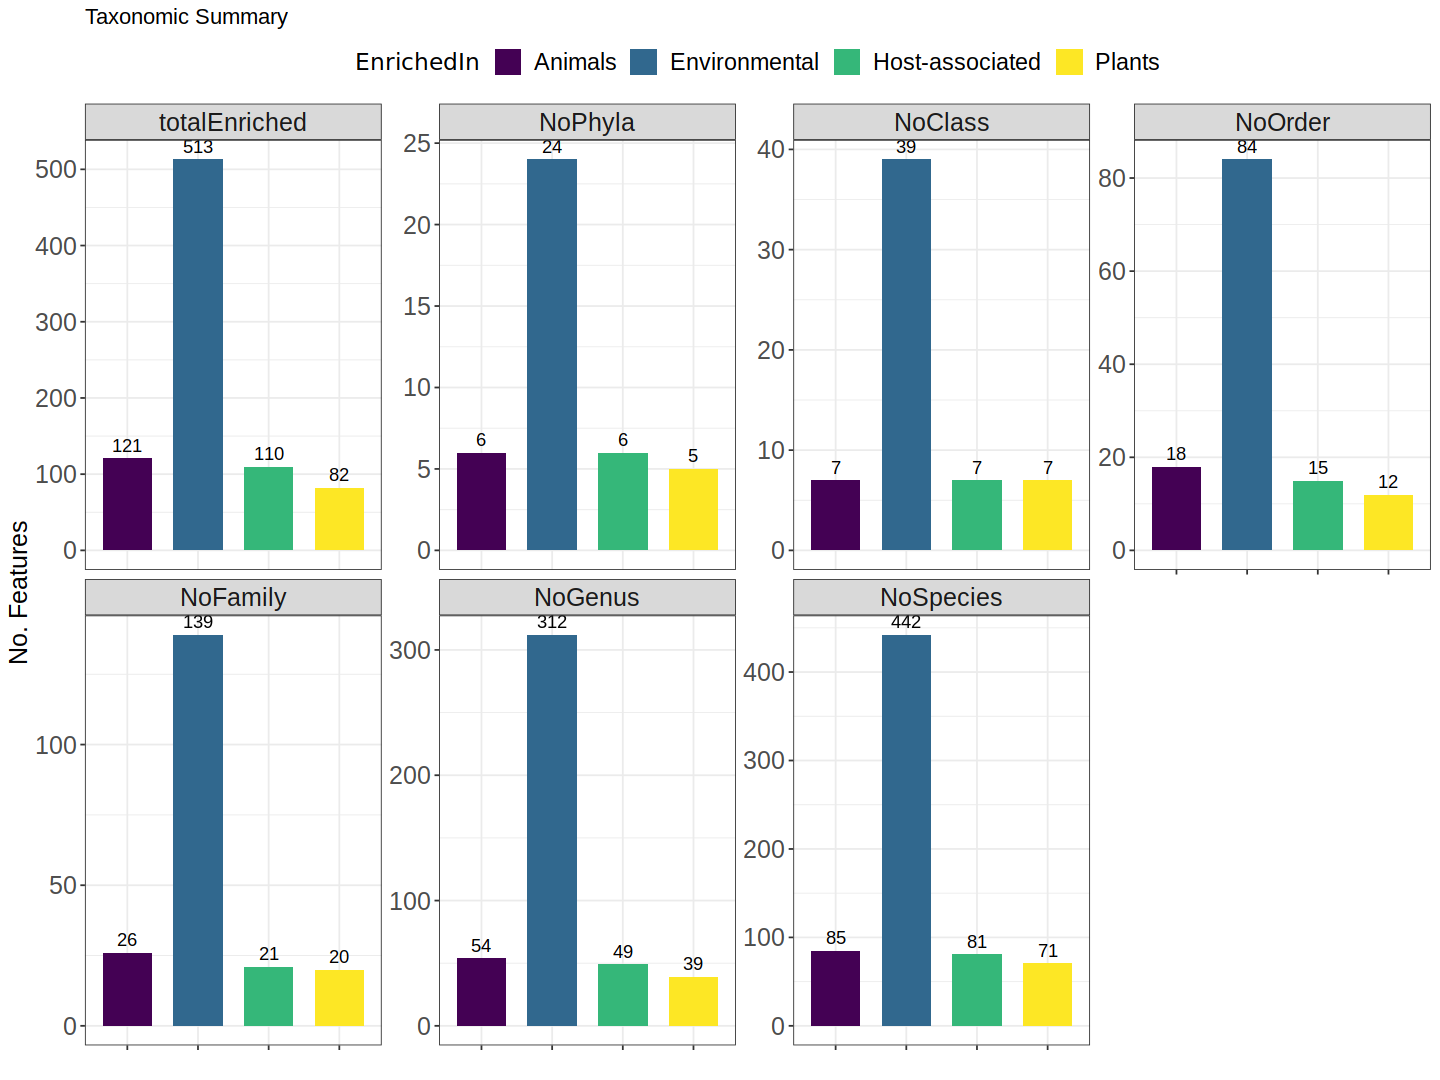

In [16]:
options(repr.plot.width = 12,repr.plot.height=9)
ggplot(data = meltTaxBiomes, aes(x = EnrichedIn, y = value, fill = EnrichedIn)) +
geom_bar(stat = "identity", width = 0.7) +
geom_text(aes(label=value,vjust=-0.5))+
labs(title = "Taxonomic Summary",
        x = "", y = "No. Features") +
theme_bw() +
scale_fill_viridis_d()+
theme(legend.position = "top",
     axis.text.x = element_blank(),
     axis.text.y = element_text(size=15),
     axis.title.y= element_text(size=15),
     legend.text = element_text(size=14),
     legend.title = element_text(size=14,"bold"),
     strip.text = (element_text(size=15)))+
facet_wrap(~variable,scales="free_y",nrow=2)

    


## Animals

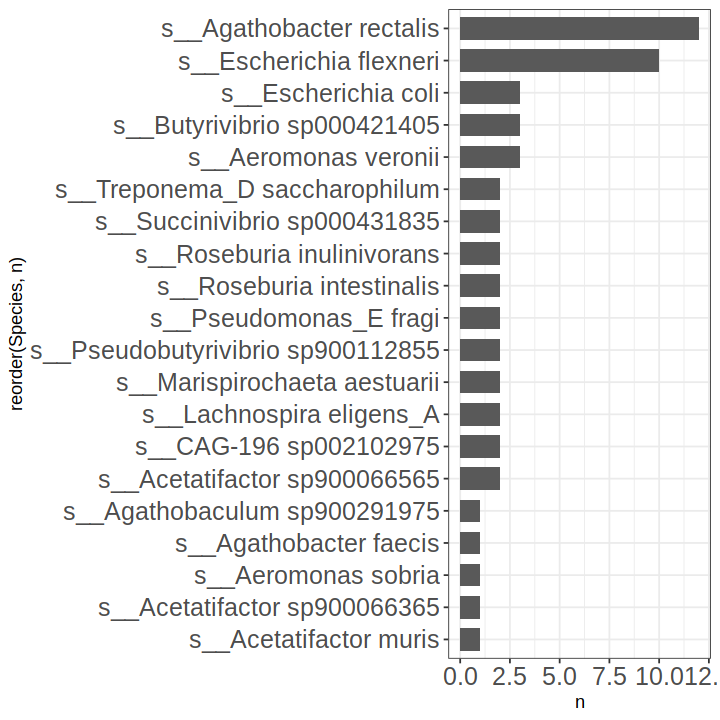

In [17]:
#Summarize number of flagellins per species
options(repr.plot.width = 6,repr.plot.height=6)
ggplot(count(tmpAn,Species,sort=TRUE)[1:20,],aes(y=reorder(Species,n),x=n))+
geom_bar(stat="identity",width=0.7)+
theme_bw()+
theme(axis.text.x = element_text(size=15),
     axis.text.y = element_text(size=15))

Warning message:
“Ignoring unknown parameters: bins”


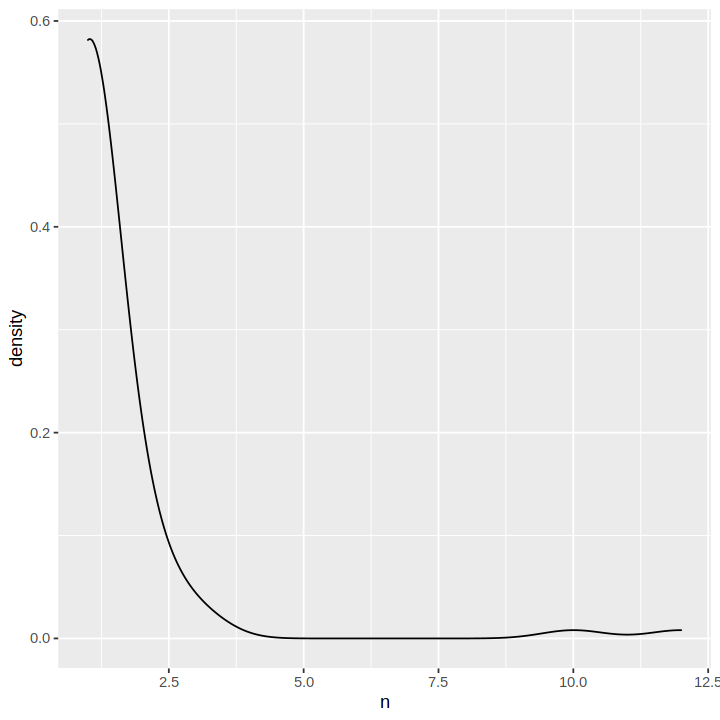

In [18]:
#Check distribution of flagellins/species
options(repr.plot.width = 6,repr.plot.height=6)
ggplot(count(tmpAn,Species,sort=TRUE),aes(x=n))+
geom_density(bins = 40)

#### Filter sequences

In [55]:
extractAn = semi_join(tmpAn, #taxonomy of enriched flagellins in animals
                      count(tmpAn,Species,sort=TRUE) %>% filter(n>1), #Extract species with more than one flagellin
                     by="Species") #join by species name
head(extractAn)

Accession,Domain,Phylum,Class,Order,Family,Genus,Species,logFC,logCPM,PValue,FDR,EnrichedIn
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RHP37040.1,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Acetatifactor,s__Acetatifactor sp900066565,-4.137041,12.78049,3.316435e-22,7.255623e-20,Animals
EIC00583.1,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Treponematales,f__Treponemataceae,g__Treponema_D,s__Treponema_D saccharophilum,-2.171939,11.27565,1.081223e-13,7.884922e-12,Animals
WP_072280274.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia flexneri,-2.402003,11.39881,1.132341e-13,7.962783e-12,Animals
CDC79573.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,-2.091190,11.20323,3.948165e-12,2.429355e-10,Animals
SEK95452.1,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Pseudobutyrivibrio,s__Pseudobutyrivibrio sp900112855,-1.864833,11.07126,7.111111e-12,4.118170e-10,Animals
RHU62160.1,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Acetatifactor,s__Acetatifactor sp900066565,-2.004874,11.16386,1.056193e-11,5.776789e-10,Animals


In [56]:
keep.prot.animals = flagellins.markers.sb[c(which(names(flagellins.markers.sb) %in% extractAn$Accession))]

In [57]:
length(keep.prot.animals)

[1] 51

In [42]:
write.fasta(sequences=keep.prot.animals,names=names(keep.prot.animals),nbchar=80,file.out="subsampled_opt1/multipleFlasPerSpecies_animals.faa")

In [69]:
write_tsv(extractAn,file="subsampled_opt1/multipleFlasPerSpecies_animals.tsv")

### Plants

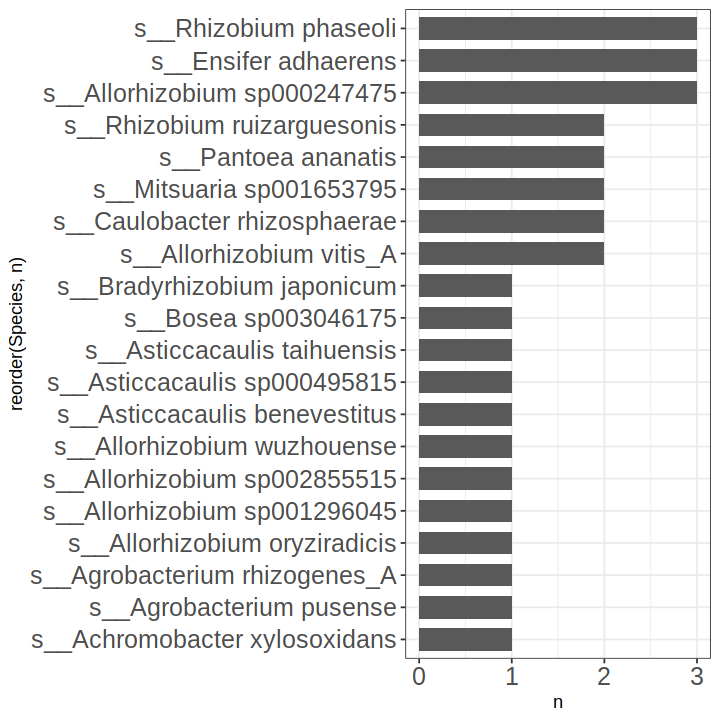

In [29]:
#Summarize number of flagellins per species
options(repr.plot.width = 6,repr.plot.height=6)
ggplot(count(tmpPl,Species,sort=TRUE)[1:20,],aes(y=reorder(Species,n),x=n))+
geom_bar(stat="identity",width=0.7)+
theme_bw()+
theme(axis.text.x = element_text(size=15),
     axis.text.y = element_text(size=15))

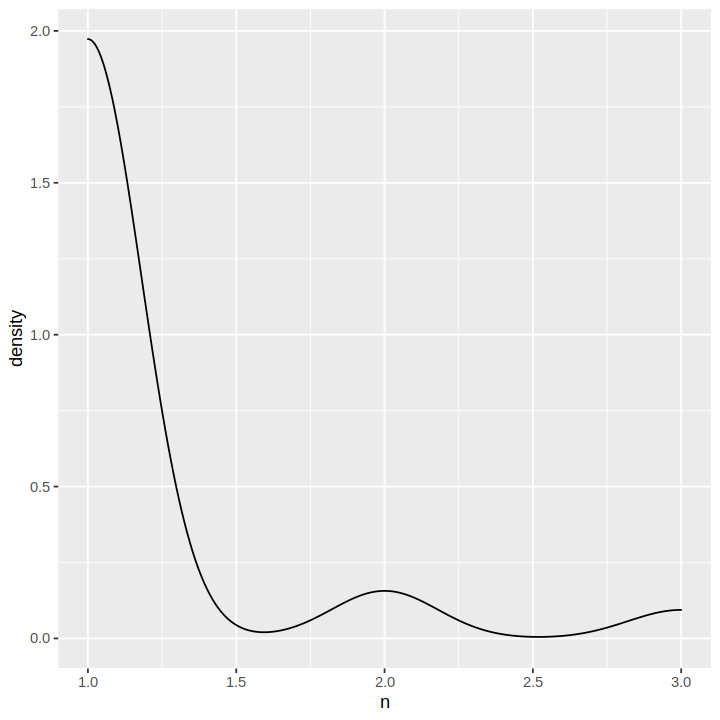

In [28]:
#Check distribution of number of flagellins per species
ggplot(count(tmpPl,Species,sort=TRUE),aes(x=n))+
geom_density()

#### Filter sequences

In [54]:
#### Extract flagellins from species with >1 flagellin
extractPl = semi_join(tmpPl, #taxonomy of enriched flagellins in plants
                      count(tmpPl,Species,sort=TRUE) %>% filter(n>1), #Extract species with more than one flagellin
                     by="Species") #join by species name
head(extractPl)

Accession,Domain,Phylum,Class,Order,Family,Genus,Species,logFC,logCPM,PValue,FDR,EnrichedIn
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EHS52757.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Allorhizobium,s__Allorhizobium sp000247475,2.741936,11.02470,1.162711e-45,1.144689e-42,Plants
EHS53753.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Allorhizobium,s__Allorhizobium sp000247475,2.662170,11.01887,9.249745e-44,6.070916e-41,Plants
EHS53752.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Allorhizobium,s__Allorhizobium sp000247475,2.546891,10.93027,1.695101e-41,8.344137e-39,Plants
ACE93333.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Rhizobium,s__Rhizobium phaseoli,1.494688,10.59173,1.181276e-20,2.325932e-18,Plants
WP_109855741.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Ensifer,s__Ensifer adhaerens,1.624468,10.60927,1.297648e-19,2.322789e-17,Plants
WP_028734014.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Rhizobium,s__Rhizobium ruizarguesonis,1.474867,10.57286,2.409948e-19,3.954323e-17,Plants


In [58]:
keep.prot.plants = flagellins.markers.sb[c(which(names(flagellins.markers.sb) %in% extractPl$Accession))]

In [59]:
length(keep.prot.plants)

[1] 19

In [60]:
write.fasta(sequences=keep.prot.plants,names=names(keep.prot.plants),nbchar=80,file.out="subsampled_opt1/multipleFlasPerGenus_plants.faa")

In [68]:
write_tsv(extractPl,file="subsampled_opt1/multipleFlasPerSpecies_plants.tsv")

### Free-living

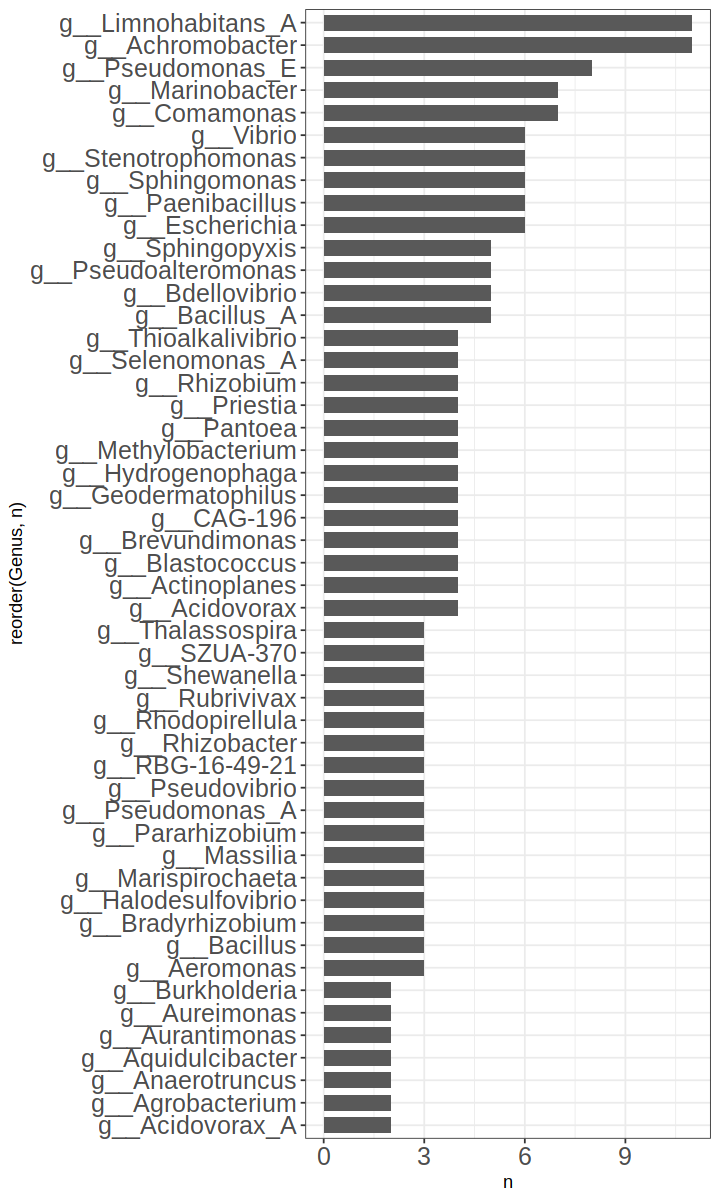

In [32]:
#Summarize number of flagellins per species
options(repr.plot.width = 6,repr.plot.height=10)
ggplot(count(DA.env,Genus,sort=TRUE)[1:50,],aes(y=reorder(Genus,n),x=n))+
geom_bar(stat="identity",width=0.7)+
theme_bw()+
theme(axis.text.x = element_text(size=15),
     axis.text.y = element_text(size=15))

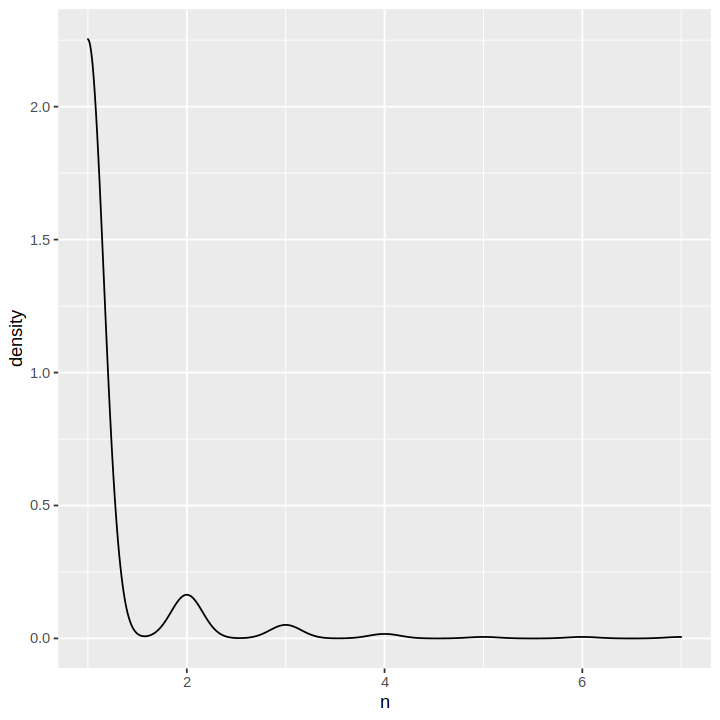

In [31]:
#Check distribution of # flagellins per species
options(repr.plot.width = 6,repr.plot.height=6)
ggplot(count(DA.env,Species,sort=TRUE),aes(x=n))+
geom_density()

In [62]:
#### Extract flagellins from species with >1 flagellin
extractEnv = semi_join(DA.env, #taxonomy of enriched flagellins in free-living
                      count(DA.env,Species,sort=TRUE) %>% filter(n>1), #Extract species with more than one flagellin
                     by="Species") #join by species name
head(extractEnv)

Accession,Domain,Phylum,Class,Order,Family,Genus,Species,logFC,logCPM,PValue,FDR,EnrichedIn
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ORC34218.1,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__JC444,f__Marispirochaetaceae,g__Marispirochaeta,s__Marispirochaeta aestuarii,-2.967947,11.40375,3.992201e-47,1.311438e-44,Environmental
SOB91381.1,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales_A,f__Planococcaceae,g__Ureibacillus,s__Ureibacillus xyleni,-2.600297,10.86048,7.213992e-45,2.031254e-42,Environmental
OAS88434.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Achromobacter,s__Achromobacter xylosoxidans,-2.135009,11.36545,9.798241e-45,2.414042e-42,Environmental
KOQ58417.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Achromobacter,s__Achromobacter xylosoxidans,-1.919139,11.23390,1.648843e-41,2.499899e-39,Environmental
WP_116520833.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Achromobacter,s__Achromobacter insuavis,-1.944934,11.19566,2.478477e-40,3.489342e-38,Environmental
OHD63782.1,d__Bacteria,p__Spirochaetota,c__UBA4802,o__UBA4802,f__UBA5550,g__RBG-16-49-21,s__RBG-16-49-21 sp001829455,-1.691385,10.54732,4.494092e-32,4.218026e-30,Environmental


In [63]:
keep.prot.env = flagellins.markers.sb[c(which(names(flagellins.markers.sb) %in% extractEnv$Accession))]

In [64]:
length(keep.prot.env)

[1] 115

In [65]:
write.fasta(sequences=keep.prot.env,names=names(keep.prot.env),nbchar=80,file.out="subsampled_opt1/multipleFlasPerSpecies_env.faa")

In [67]:
write_tsv(extractEnv,file="subsampled_opt1/multipleFlasPerSpecies_env.tsv")

#TO DO: Check nucleotide diversity

In [22]:
protAn = read.fasta("subsampled_opt1/cds/codon_alignments/all.cds.prot.animals.faa")

In [23]:
alignment_an  = ape::as.alignment(protAn)